# Composition project. Data аnalysis of gaming on-line store

You work for the online store "Streamlet," which sells computer games worldwide. Historical data on game sales, user and expert ratings, genres, and platforms (e.g., Xbox or PlayStation) are available from open sources. Your task is to identify patterns that determine the success of a game. This will allow you to bet on a potentially popular product and plan advertising campaigns.

You have data up to 2016. Let's imagine it's December 2016, and you're planning a campaign for 2017. You need to work out how to handle the data. It doesn't matter if you're forecasting sales for 2017 based on 2016 data or 2027 based on 2026 data.

The dataset includes the abbreviation ESRB (Entertainment Software Rating Board) - an association that determines the age rating of computer games. ESRB evaluates game content and assigns it an appropriate age category, such as "Adults Only," "Early Childhood," or "Teen."

Data Description:

* Name — game name
* Platform — platform
* Year_of_Release — release year
* Genre — game genre
* NA_sales — sales in North America (millions of copies sold)
* EU_sales — sales in Europe (millions of copies sold)
* JP_sales — sales in Japan (millions of copies sold)
* Other_sales — sales in other countries (millions of copies sold)
* Critic_Score — critic score (maximum 100)
* User_Score — user score (maximum 10)
* Rating — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

Data for 2016 may be incomplete.

**Project navigation**

[1. Data loading](#1.-Data-loading)

[2. Data preprocessing](#2.-Data-preprocessing)
 - [Task 1. Change columns name (convert  data to lowercase)](#Task-1.-Change-columns-name-(convert-data-to-lowercase))
 - [Task 2. Check missing values](#Task-2.-Check-missing-values)
 - [Task 3. Сonvert data to lowercase in several columns](#Task-3.-Сonvert-data-to-lowercase-in-several-columns)
 - [Task 4. Calculate sum sales in all regions and apply to new column](#Task-4.-Calculate-sum-sales-in-all-regions-and-apply-to-new-column)
    
[3. Exploratory data analysis](#3.-Exploratory-data-analysis)
 - [Task 1. Check how many games released by years. Is it important to have data of whole period?](#Task-1.-Check-how-many-games-released-by-years.-Is-it-important-to-have-data-of-whole-period?)
 - [Task 2. Looking at sales by platform. Select platforms with max sum sales and build sales distribution per year. What is life cycle of platforms?](#Task-2.-Looking-at-sales-by-platform.-Select-platforms-with-max-sum-sales-and-build-sales-distribution-per-year.-What-is-life-cycle-of-platforms?)
 - [Task 3. Show top-platforms in sales, are they increasing or decreasing? Choose potential profitable platforms.](#Task-3.-Show-top-platforms-in-sales,-are-they-increasing-or-decreasing?-Choose-potential-profitable-platforms.)
 - [Task 4. Build boxplot for global games sales by platforms. Describing a result.](#Task-4.-Build-boxplot-for-global-games-sales-by-platforms.-Describing-a-result.)
 - [Task 5. Look at correlation between scores and sales. Build scatter plot and calculate correlation between scores and sales. Formulate conclusions.](#Task-5.-Look-at-correlation-between-scores-and-sales.-Build-scatter-plot-and-calculate-correlation-between-scores-and-sales.-Formulate-conclusions.)
 - [Task 6. Look at general distribution of games by genres. What are spefics for profitable genres? Are there big differences between profitable and non-profitable genres?](#Task-6.-Look-at-general-distribution-of-games-by-genres.-What-are-spefics-for-profitable-genres?-Are-there-big-differences-between-profitable-and-non-profitable-genres?)
    
[4. Build user portret for each region](#4.-Build-user-portret-for-each-region)
 - [Task 1. TOP-5 platforms for each region. Describe differences in sales shares.](#Task-1.-TOP-5-platforms-for-each-region.-Describe-differences-in-sales-shares.)
 - [Task 2. Top-5 genres. Describe differences.](#Task-2.-Top-5-genres.-Describe-differences.)
 - [Task 3. Does raiting ESRB infuence on sales in particular region?](#Task-3.-Does-raiting-ESRB-infuence-on-sales-in-particular-region?)
    
[5. Hypotheses testing](#5.-Hypotheses-testing)
 - [Task 1. Hypothesis test: Average user ratings Xbox One and PC don't have differences.](#Task-1.-Hypothesis-test:-Average-user-ratings-Xbox-One-and-PC-don't-have-differences.)
 - [Task 2. Hypothesis test: Average user ratings for genres Action and Sports are different.](#Task-2.-Hypothesis-test:-Average-user-ratings-for-genres-Action-and-Sports-are-different.)

[Main summary](#Main-summary)

##  1. Data loading

Loading the data from CSV files into dataframes using libraries.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

plt.rcParams['figure.figsize'] = (20,5)

In [2]:
research_games = pd.read_csv('games.csv')

In [3]:
research_games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12594,Mobile Suit Gundam: Gundam vs. Zeta Gundam,PS2,2004.0,Shooter,0.03,0.02,0.00,0.01,57.0,8.6,T
574,Super Mario Bros.: The Lost Levels,NES,1986.0,Platform,0.00,0.00,2.65,0.00,NaN,NaN,NaN
202,FIFA Soccer 11,PS3,2010.0,Sports,0.61,3.28,0.06,1.12,89.0,8,E
9003,Spider-Man: Friend or Foe,Wii,2007.0,Action,0.13,0.00,0.00,0.01,59.0,8,E10+
12871,F1 2010,PC,2010.0,Racing,0.00,0.05,0.00,0.01,84.0,6.6,E
4953,EA Sports Active 2,X360,2010.0,Sports,0.18,0.16,0.00,0.04,68.0,5.4,E
5304,Xbox Music Mixer,XB,2003.0,Misc,0.26,0.08,0.00,0.01,49.0,tbd,E
5205,The Chronicles of Narnia: Prince Caspian,Wii,2008.0,Action,0.31,0.02,0.00,0.03,63.0,7.1,T
9557,Under Night In-Birth,PS3,2014.0,Fighting,0.06,0.01,0.04,0.02,NaN,NaN,NaN
10682,College Hoops 2K6,XB,2005.0,Sports,0.07,0.02,0.00,0.00,82.0,9.2,E


In [4]:
research_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Looking at data and found missing values, incorrect data types for the columns Year_of_Release, User_Score, and Critic_Score. The next step is to preprocess data.

##  2. Data preprocessing

### Task 1. Change columns name (convert  data to lowercase)

In [5]:
research_games.columns = research_games.columns.str.lower()

In [6]:
research_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14167,Asterix & Obelix: Kick Buttix,PS2,2004.0,Action,0.02,0.01,0.00,0.00,NaN,NaN,NaN
12549,Busy Scissors,DS,2010.0,Simulation,0.06,0.00,0.00,0.00,NaN,tbd,E
9490,NightCaster,XB,2002.0,Action,0.10,0.03,0.00,0.00,61.0,5.7,T
11671,Slayers Royal 2,SAT,1998.0,Role-Playing,0.00,0.00,0.08,0.00,NaN,NaN,NaN
10995,NHL 2K8,PS3,2007.0,Sports,0.08,0.01,0.00,0.01,74.0,tbd,E10+
688,Guild Wars 2,PC,2012.0,Action,0.96,1.07,0.00,0.27,90.0,7.9,T
16110,Valentino Rossi: The Game,PC,2016.0,Racing,0.00,0.01,0.00,0.00,72.0,6.2,E
3375,Dragon Age: Inquisition,PS3,2014.0,Role-Playing,0.27,0.18,0.05,0.09,NaN,5.2,M
14101,Ultimate Game Room,DS,2009.0,Misc,0.03,0.00,0.00,0.00,NaN,tbd,E
14186,Silent Scope,GBA,2002.0,Shooter,0.02,0.01,0.00,0.00,70.0,8,T


### Task 2. Check missing values

In [7]:
pd.DataFrame(round(research_games.isna().mean()*100,2)).style.background_gradient('coolwarm')

,0
name,0.010000
platform,0.000000
year_of_release,1.610000
genre,0.010000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.320000
user_score,40.090000


critic_score, user_score, rating have 50% missing values out of 16713 rows. В year_of_release есть дубликаты. Name has 2 missing values. Look at it.

In [8]:
research_games[research_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Let's remove 2 rows with missing values in 'Name' column - these data also lack Genre, Scores, Rating, and have almost zero sales. We conclude that removing these 2 rows will not affect results of subsequent analysis.
A possible reason for the missing values could be technical error in pulling data from open sources or incomplete data entry.

In [9]:
research_games.dropna(subset = ['name'], inplace = True)

# display once again to check missing values by name
research_games[research_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [10]:
research_games[research_games['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Column year_of_release shows 269 missing values. Seems that is error in uploading process. Share of missing values here is only 1.6% from total, we can remove this data.

In [11]:
research_games.dropna(subset = ['year_of_release'], inplace = True)

In [12]:
# checking missing values after removal
pd.DataFrame(round(research_games.isna().mean()*100,2)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.450000
user_score,40.170000


In [13]:
# change type for year_of_release
research_games['year_of_release'] = research_games['year_of_release'].astype('int')

In [14]:
# fullfill tbd by missing items for making easier data preprocessing
research_games.user_score = np.where(research_games.user_score == 'tbd', np.nan, research_games.user_score).astype('float')

In 'user_score' column, 'tbd' stands for "to be determined," indicating rating will be determined later. There are approximately 2424 rows. Let's fill them with NaNs so that we can change data type.

### Task 3.  Сonvert  data to lowercase in several columns

In [15]:
columns_to_lower = ['name', 'platform', 'genre']

for column in columns_to_lower:
    research_games[column] = research_games[column].str.lower()

Columns critic_score, 	user_score, rating has 50% missing values out of whole data. Seems it is erroe of uploading, or critics\users didnt score games. Change missing values, unfortunately, is not possibly by any logic, changes can negativly influance on data quality.

In [16]:
# check explicit duplicates
research_games.duplicated().sum()

0

### Task 4. Calculate sum sales in all regions and apply to new column.

In [17]:
research_games['total_sales'] = research_games.loc[:, research_games.columns.str.endswith('_sales')].sum(axis=1)
research_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


**Section summary**

 - Removed missing values representing a negligible fraction of all rows (year_of_release and name).
 - Missing values in user_score, critic_score, and rating, as well as 'tbd'.
 - Changed data types for year_of_realese.
 - Checked for obvious duplicates in the data.
 - Converted the names of some columns and their data to lowercase.
 - Calculated the total sales across all regions and recorded them in a separate column named total_sales.

##  3. Exploratory data analysis

### Task 1. Check how many games released by years. Is it important to have data of whole period?

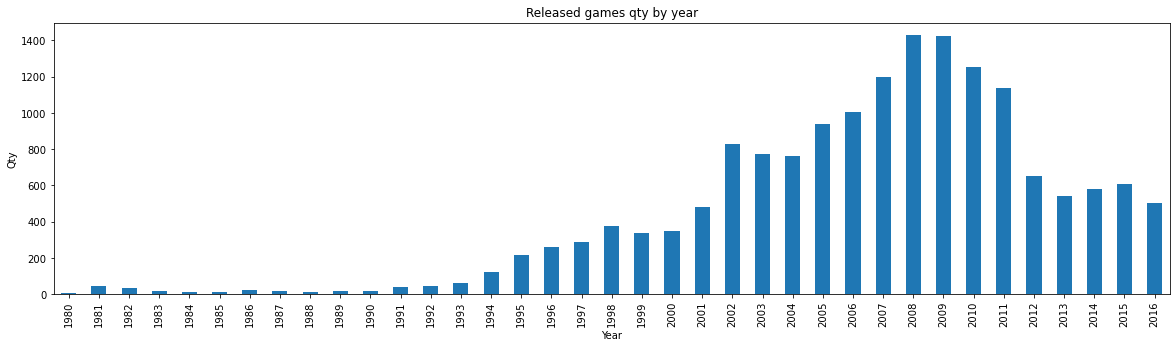

In [18]:
research_games[research_games.year_of_release.notnull()].year_of_release.astype('int').value_counts().sort_index().plot(kind='bar', title='Released games qty by year')


plt.xlabel('Year')
plt.ylabel('Qty')
plt.show()

Data shows that main activity started from 2002. Save data from 2002 for next steps.

### Task 2. Looking at sales by platform. Select platforms with max sum sales and build sales distribution per year. What is life cycle of platforms?

In [19]:
platform_sales = research_games.groupby('platform').total_sales.sum().sort_values(ascending=False)
platform_sales

platform
ps2     1233.56
x360     961.24
ps3      931.34
wii      891.18
ds       802.78
ps       727.58
ps4      314.14
gba      312.88
psp      289.53
3ds      257.81
pc       255.76
gb       254.43
xb       251.57
nes      251.05
n64      218.01
snes     200.04
gc       196.73
xone     159.32
2600      86.48
wiiu      82.19
psv       53.81
sat       33.59
gen       28.35
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: total_sales, dtype: float64

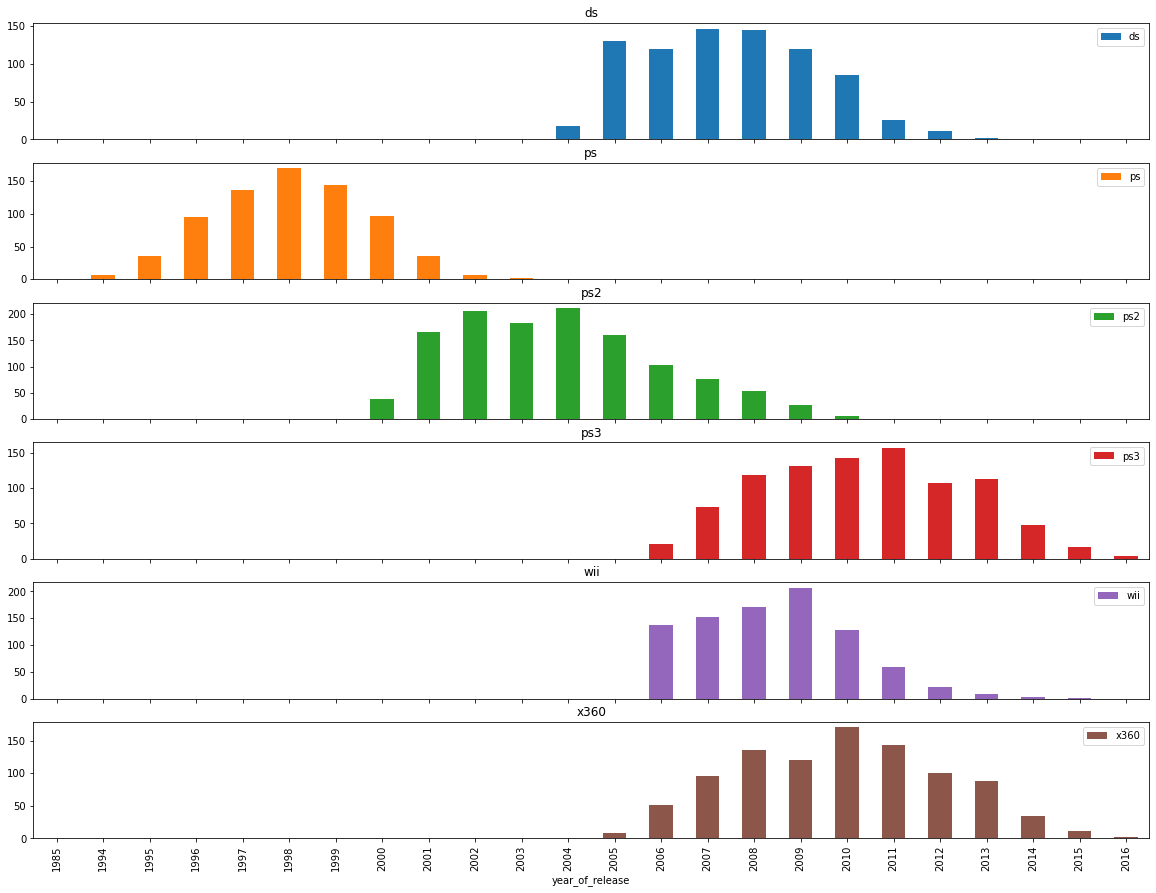

In [20]:
# forming top-platforms list and building visualization
top_platforms = research_games[research_games.platform.isin(platform_sales.index[:6])]

(
    top_platforms
    .groupby(['year_of_release','platform']) 
    .total_sales
    .sum() 
    .unstack(1) 
    .plot(kind='bar', subplots=True, figsize=(20,15))
)
plt.show()

Sugnificant sales decrease  start from 3rd year of platform cycle. Making decision to use relevant data from 2014 (2016-3 years).

### Task 3. Show top-platforms in sales, are they increasing or decreasing? Choose potential profitable platforms. 

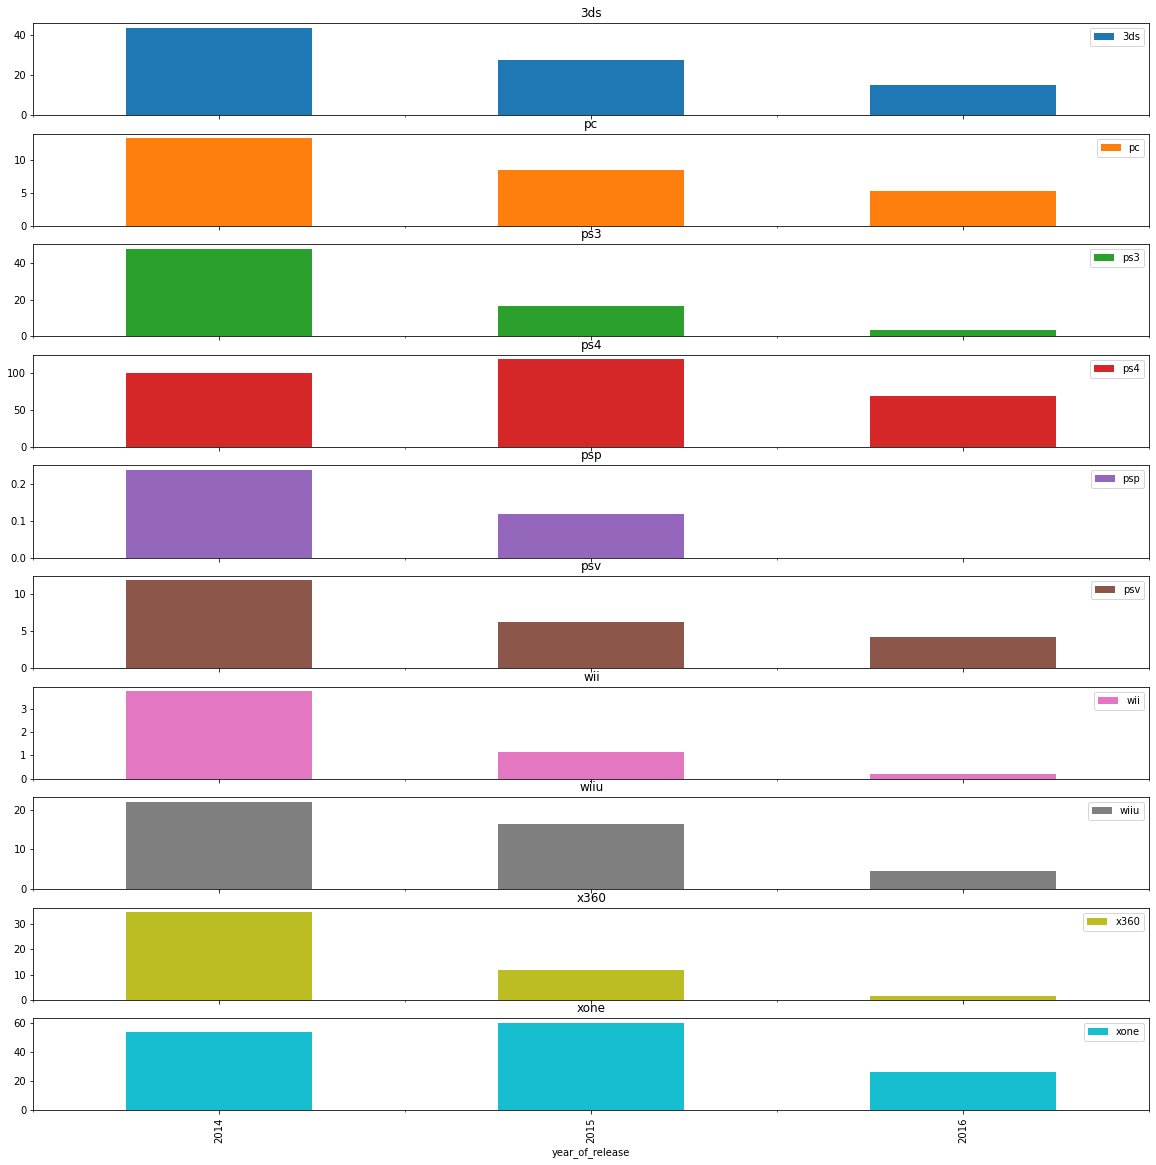

In [21]:
(
    research_games[research_games.year_of_release >= 2014]
    .groupby(['year_of_release','platform']) 
    .total_sales
    .sum() 
    .unstack(1) 
    .plot(kind='bar', subplots=True, figsize=(20,20))
)
plt.show()

Skip PS3, PSP, Wii, X360 from analysis, they were ended life cycle in 2016.

XOne, PS4 looks profitable due to sales increase in 2015. In generall, sales trend is negative.

In [22]:
research_games_refreshed = research_games.query('year_of_release >= 2014 & platform not in ["PS3", "X360", "Wii", "PSP"]').reset_index(drop=True)
research_games_refreshed.shape

(1689, 12)

### Task 4. Build boxplot for global games sales by platforms. Describing a result.

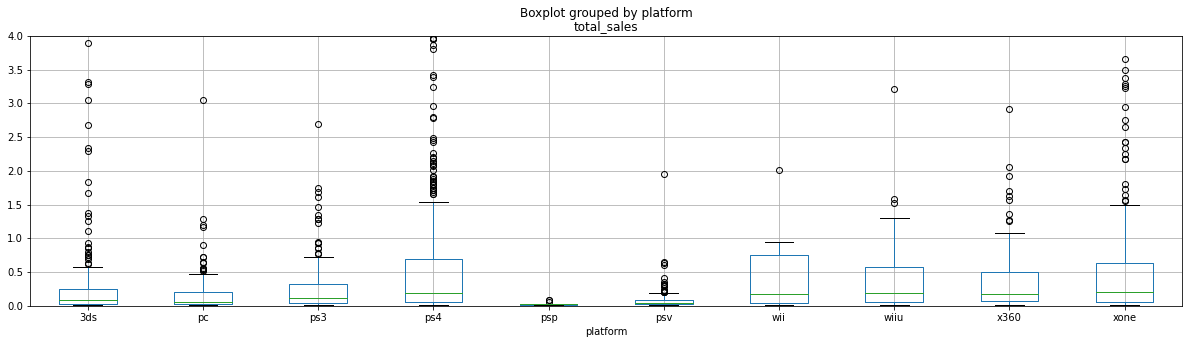

In [23]:
research_games_refreshed.boxplot('total_sales', by='platform')

plt.ylim(0, 4)
plt.show()

PS4, WiiU, XOne looks as top-rated in sales

### Task 5. Look at correlation between scores and sales. Build scatter plot and calculate correlation between scores and sales. Formulate conclusions.

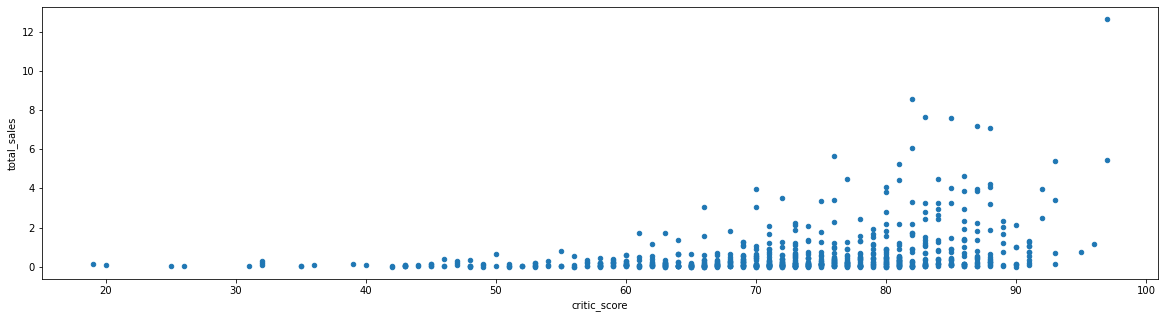

In [24]:
research_games_refreshed.plot(x='critic_score', y='total_sales', kind='scatter')
plt.show()

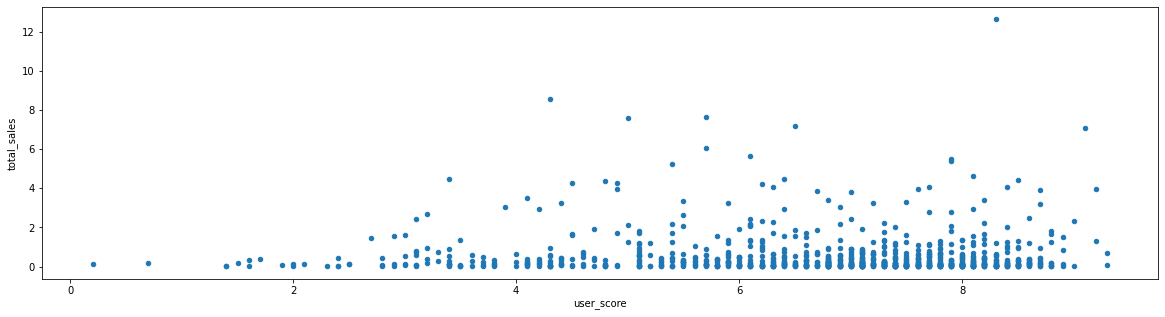

In [25]:
research_games_refreshed.plot(x='user_score', y='total_sales', kind='scatter')
plt.show()

In [26]:
research_games_refreshed[['critic_score', 'user_score', 'total_sales']].corr().style.background_gradient(cmap='coolwarm')

,critic_score,user_score,total_sales
critic_score,1.000000,0.504460,0.328105
user_score,0.504460,1.000000,-0.013070
total_sales,0.328105,-0.013070,1.000000


No strong correlation between scores and sales. Critic score may slightly correlate to sales.

### Task 6. Look at general distribution of games by genres. What are spefics for profitable genres? Are there big differance between profitable and non-profitable genres?

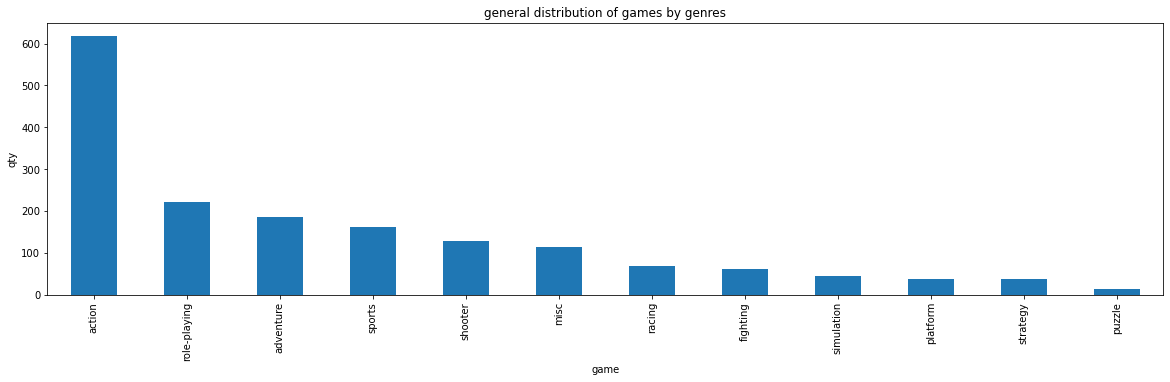

In [27]:
research_games_refreshed.genre.value_counts().plot(kind='bar', title='general distribution of games by genres')

plt.xlabel('game')
plt.ylabel('qty')
plt.show()

Main part of games were released in 'Action' genre, next one is 'Role-Playing'

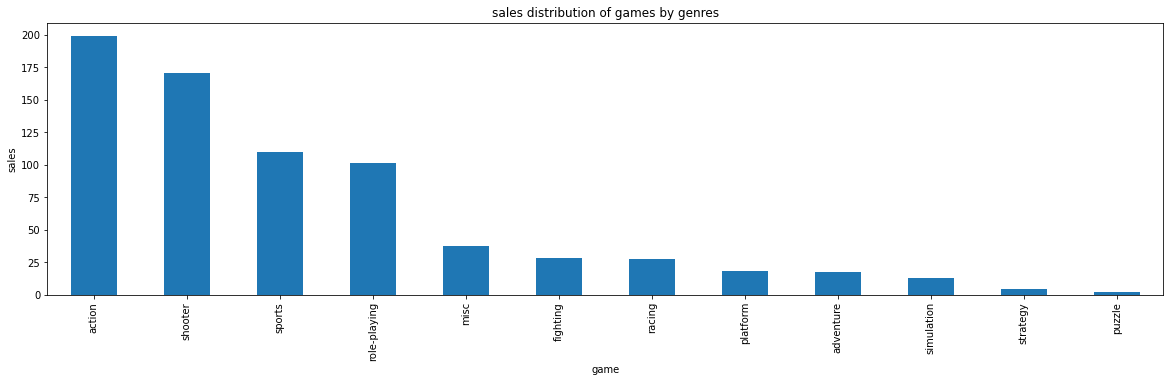

In [28]:
research_games_refreshed.groupby('genre').total_sales.sum().sort_values(ascending=False).plot(kind='bar',title='sales distribution of games by genres')

plt.xlabel('game')
plt.ylabel('sales')
plt.show()

Main profitable games were Action, Shooter and Sport.

**Section summary:**
- Data shows that main activity started from 2002. Save data from 2002 for next steps.
- Sugnificant sales decrease  start from 3rd year of platform cycle. Making decision to use relevant data from 2014 (2016-3 years).
- Skip PS3, PSP, Wii, X360 from analysis, they were ended life cycle in 2016. XOne, PS4 looks profitable due to sales increase in 2015. In generall, sales trend is negative.
- PS4, WiiU, XOne looks as top-rated in sales. 
- можно выделить жанры с высокими и низкими продажами.No strong correlation between scores and sales. Critic score may slightly correlate to sales from 60 points.
- Main part of games were released in 'Action' genre, next one is 'Role-Playing'. Main profitable games were Action, Shooter and Sport.

## 4. Build user portret for each region

### Task 1. TOP-5 platforms for each region. Describe differances in sales shares.

Trying to automate TOP-5 list per each field.

In [29]:
research_games_refreshed[['platform', 'genre', 'rating', 'na_sales', 'eu_sales', 'jp_sales']].head(5)

,platform,genre,rating,na_sales,eu_sales,jp_sales
0,ps4,shooter,NaN,6.03,5.86,0.36
1,ps4,action,M,3.96,6.31,0.38
2,3ds,role-playing,NaN,4.35,3.49,3.10
3,ps4,sports,E,1.12,6.12,0.06
4,ps4,shooter,NaN,2.99,3.49,0.22


In [30]:
# prepare data for melt() method where we change orientation of regional sales from horizontal to vertical
sales_columns = research_games_refreshed.columns[research_games_refreshed.columns.str.endswith('_sales') & ~(research_games_refreshed.columns.isin(['other_sales', 'total_sales']))]

research_games_sales_melt = pd.melt(research_games_refreshed, \
                           id_vars=['platform', 'genre', 'rating'], \
                           value_vars=sales_columns, \
                           var_name='country', value_name='sales')

research_games_sales_melt.head()

,platform,genre,rating,country,sales
0,ps4,shooter,NaN,na_sales,6.03
1,ps4,action,M,na_sales,3.96
2,3ds,role-playing,NaN,na_sales,4.35
3,ps4,sports,E,na_sales,1.12
4,ps4,shooter,NaN,na_sales,2.99


In [31]:
# subtable with sales for each country to count percentage share
research_games_sales_by_country = (
                                     research_games_sales_melt
                                    .groupby('country')
                                    .sales
                                    .sum()
                                    .reset_index()
                                    .rename(columns={'sales': 'total_sales'})
                   )
research_games_sales_by_country

,country,total_sales
0,eu_sales,270.68
1,jp_sales,93.09
2,na_sales,284.06


In [32]:
# now we can wrute function for top-5 per each field(seles, genre, ESBR score)
def showTop5(column):
    return (
         research_games_sales_melt
        .groupby(['country', column]) # griup by country and choosed field
        .sales
        .sum() # sales sum
        .reset_index() 
        .sort_values(by = ['country', 'sales'], ascending=[True, False]) # sorting by country and sales
        .groupby(['country'])
        .head(5) # choosing top-5 per each country
        .merge(research_games_sales_by_country, on = 'country') # merging sales by country
        .assign(sales_share = lambda x: (x['sales'] / x['total_sales'])) # calculating sales share per country out of total sales
        .drop('total_sales', axis=1) # deleting total sales column
        .style.format({
            'sales': '{:,.1f}'.format,
            'sales_share': '{:,.1%}'.format
        })
    )

In [33]:
# check how function works
showTop5('platform') #Perfect!

,country,platform,sales,sales_share
0,eu_sales,ps4,130.0,48.0%
1,eu_sales,xone,46.3,17.1%
2,eu_sales,ps3,25.5,9.4%
3,eu_sales,pc,18.0,6.6%
4,eu_sales,3ds,16.1,6.0%
5,jp_sales,3ds,44.2,47.5%
6,jp_sales,ps4,15.0,16.1%
7,jp_sales,psv,14.5,15.6%
8,jp_sales,ps3,11.2,12.1%
9,jp_sales,wiiu,7.3,7.9%


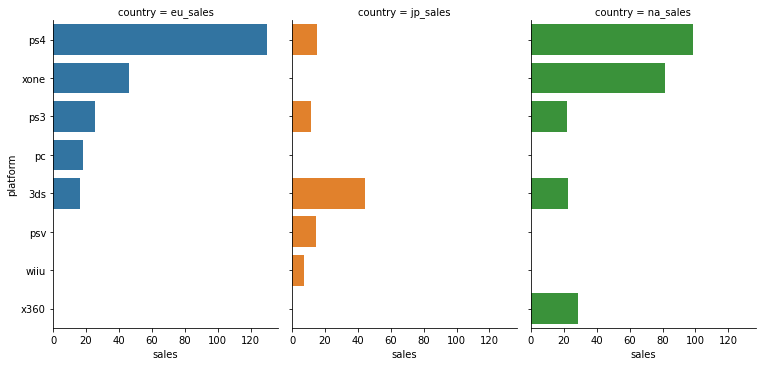

In [34]:
# visualize data
sns.catplot(data=showTop5('platform').data,kind='bar', x='sales', y='platform', hue='country', col='country', aspect=0.7, dodge=False)

plt.show()

 - EU market shows ps4,xone and ps3 as a leaders in sales
 - North american market shows ps4,xone and x360
 - Japanese market shows 3ds,ps4 and psv  as a leaders in sales
 
The EU and American markets show similarities in games platform amoung users, as far as Japanese market is totally different.

### Task 2. Top-5 genres. Describe differences.

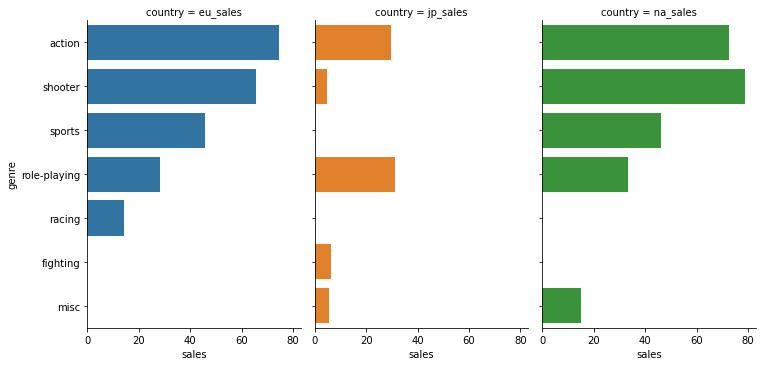

In [35]:
# visualize data
sns.catplot(data=showTop5('genre').data,kind='bar', x='sales', y='genre', hue='country', col='country', aspect=0.7, dodge=False)

plt.show()

TOP genres in EU and NA markets again show similarities - Action, Shooter and Sports are most popular. Japanese market shows another picture - top genres here are Role playing and Action.

### Task 3. Does raiting ESRB infuence on sales in particular region?

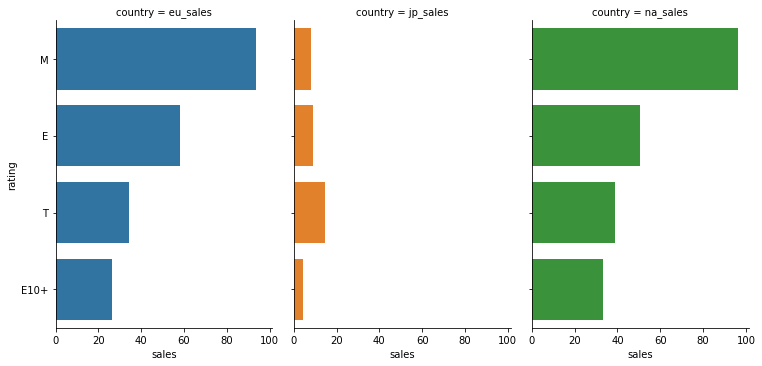

In [36]:
# visualize data
sns.catplot(data=showTop5('rating').data,kind='bar', x='sales', y='rating', hue='country', col='country', aspect=0.7, dodge=False)

plt.show()

Again there are huge correlation between North America and EU. Sales structure by ESRB rating shows that 50% out of total sales connect to M rating(adult users). Japanese market shows interest in T games (for teenagers) - around 32% iut of total Japanese sales, games for adults show only 25% out of total Japanese sales. Games with E10+ rating (for kids under 10 years) is least popular within all regions.

**Section summary**
Analyzed following parameters:

- Top platforms. EU market shows ps4,xone and ps3 as a leaders in sales. North american market shows ps4,xone and x360. Japanese market shows 3ds,ps4 and psv  as a leaders in sales.
The EU and American markets show similarities in games platform amoung users, as far as Japanese market is totally different.
- Top genres. TOP genres in EU and NA markets again show similarities - Action, Shooter and Sports are most popular. Japanese market shows another picture - top genres here are Role playing and Action.
- ESRB rating infuence. There are huge correlation between North America and EU. Sales structure by ESRB rating shows that 50% out of total sales connect to M rating(adult users). Japanese market shows interest in T games (for teenagers) - around 32% iut of total Japanese sales, games for adults show only 25% out of total Japanese sales. Games with E10+ rating (for kids under 10 years) is least popular within all regions.

## 5. Hypotheses testing

- Average user ratings Xbox One and PC don't have differences;
- Average user ratings for genres Action and Sports are different.

### Task 1. Hypothesis test: Average user ratings Xbox One and PC don't have differences.

H_0: average user_score Xbox One = average user_score PC

H_1: average user_score Xbox One != average user_score PC

alpha = 0.05

In [37]:
average_user_score_xone = research_games_refreshed.query('platform == "xone" & user_score.notnull()', engine='python').user_score
average_user_score_pc = research_games_refreshed.query('platform == "pc" & user_score.notnull()', engine='python').user_score

results = st.ttest_ind(average_user_score_xone, 
                       average_user_score_pc)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Reject null hypothesis')
else:
    print('Null hypothesis could not be rejected')

0.10450507919348415
Null hypothesis could not be rejected


As a result of test, we can assume with high probability that average Xbox One user rating is equal to the average PC user rating.

### Task 2. Hypothesis test: Average user ratings for genres Action and Sports are different.

H_0: Average user ratings for genre Action = Average user ratings for genre Sports

H_1: Average user ratings for genre Action != Average user ratings for genre Sports

alpha = 0.05

In [38]:
average_user_score_action = research_games_refreshed.query('genre == "action" & user_score.notnull()', engine='python').user_score
average_user_score_sports = research_games_refreshed.query('genre == "sports" & user_score.notnull()', engine='python').user_score

results = st.ttest_ind(average_user_score_action, 
                       average_user_score_sports)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Reject null hypothesis')
else:
    print('Null hypothesis could not be rejected')

2.8711147985105864e-19
Reject null hypothesis


As a result of test, we can assume with high probability that average Action user rating is not equal to the average Sports user rating.

<div style="border:solid blue 3px; padding: 20px">

## Main summary

Let's formulate some recommendations for gaming online store for planning of advertising campaigns in 2017:

- life cycle is 8 years, so you should not place big bets on the sale and promotion of games on platforms for which this cycle passes the middle - from the 6th year. It is better to focus on young platforms whose lifecycle is on middle way - not more than 3 years from the release date.
- potentially profitable platforms in 2017: ps4, which brings the highest revenue from sales; 3ds, which has been popular for several years; pcv, not too popular, but still capable of making a profit in the next few years; wiiu and pc complete this list.
- one of the important criteria is the critics' assessment (the higher it is, the more likely sales increase), but it should not be considered as fundamental. You should still use several criteria together (for example, critical evaluation, genre, age restrictions, region of sale).

-  three leading genres have the highest total sales - action, shooter, role-playing. We recommend focusing on sales promotion in terms of traffic inflow in the action, shooter, role-playing genres (the largest number of games are concentrated), and to increase the average check (transaction value) - in the platform, sports, shooter genres (the average sales value is higher than in other genres).
    
For regions, we recommend the following: 
- We recommend promoting games on the ps4 and ps3 platforms in all regions. American and European generally show the same preferences, so this should also be taken into account when conducting advertising campaigns. The Japanese market is different, but the ps4 and ps3 still maintain a fairly high market share. The most popular games in America are x360 and ps4, in Europe - ps4 and ps3, in Japan - 3ds and ps3.
- by genre, you can also observe the similarity of the American and European markets - we recommend focusing on sales of Action and Shooter games. The Japanese market shows a slightly different picture - the Role playing and Action genre are in the first places.
- in each of the regions, it is recommended to sell games with an E rating ("for everyone") - they have shown themselves in leading positions.  For example, in North America and Europe, there is a similar sales structure according to the rating of games and almost 50% of sales are accounted for by the adult audience M ("for adults") - this should be taken into account. In Japan, preferences differ: teen T ("for teens") games are more popular (32% of all sales) than adult games (25% of all sales). What you should not bet on is games for children under the age of 10 (low demand in all regions).

It is also important to note the general trend of falling sales of gaming platforms in recent years. Most likely, this is naturally due to the transition to mobile platforms and online games.
We also recommend diversifying business in the future - selling not only computer games, but also cooperating with online platforms in the form of advertising integrations/subscription sales.